AI helped create the code in the notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
gender_submission_df = pd.read_csv("data/gender_submission.csv")

## Merge to Test Data Set

In [4]:
test_df = test_df.merge(gender_submission_df, on="PassengerId", how="left")

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Exploration

### Train dataset exploration

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Test dataset exploration

In [11]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [12]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [13]:
test_df.groupby("Sex")["Survived"].mean()

Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

## Good Visuals

/var/folders/lt/p6lwj8pj7vgcbcr0ylpxl6940000gn/T/ipykernel_15701/1080186267.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=train_df, ci=None)


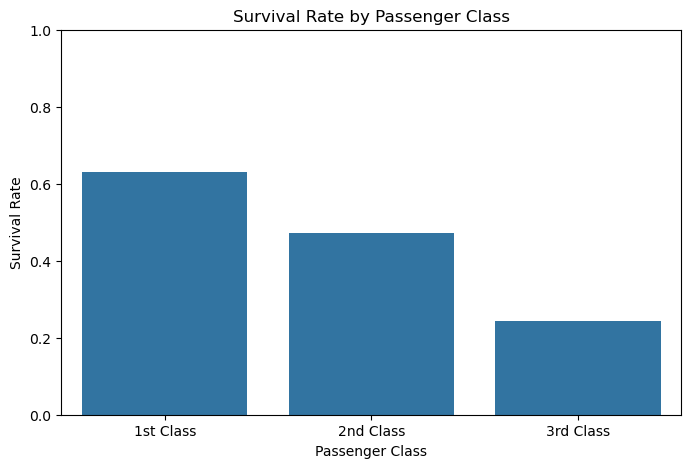

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=train_df, ci=None)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.ylim(0, 1)
plt.xticks([0, 1, 2], ["1st Class", "2nd Class", "3rd Class"])
plt.show()

Good because:
- Shows that 1st class passnegers had highest survival rate
- Uses simple chart to show meaningful information
- axis appropriate labeled
- y axis scaled appropriately to not misrepresent data

### Good visual 2

/var/folders/lt/p6lwj8pj7vgcbcr0ylpxl6940000gn/T/ipykernel_15701/1878898969.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=train_df, ci=None, palette="coolwarm")
/var/folders/lt/p6lwj8pj7vgcbcr0ylpxl6940000gn/T/ipykernel_15701/1878898969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=train_df, ci=None, palette="coolwarm")


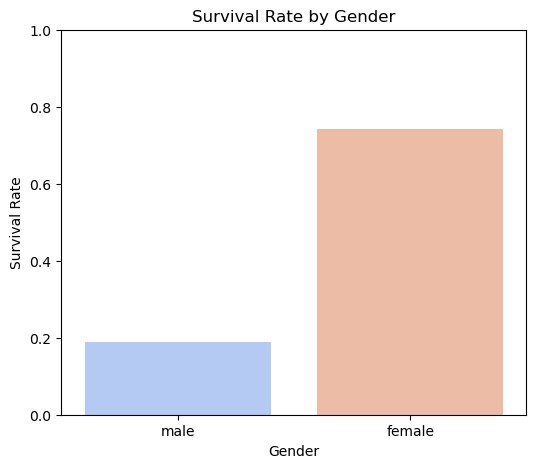

In [18]:
plt.figure(figsize=(6, 5))
sns.barplot(x="Sex", y="Survived", data=train_df, ci=None, palette="coolwarm")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.ylim(0, 1)
plt.show()

Good because:
- Shows strong gender disparity for survival rates
- uses contrasting colors
- appropriate axis and title

### Good Visual 3

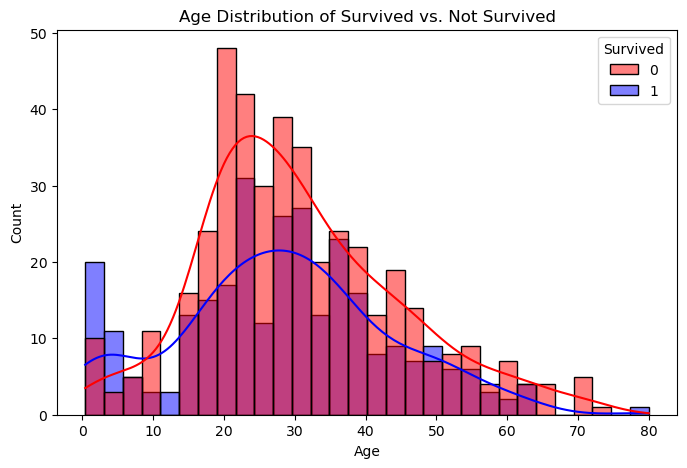

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x="Age", hue="Survived", bins=30, kde=True, palette={0: "red", 1: "blue"}, alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Survived vs. Not Survived")
plt.show()

Good because:
- Shows how age impacts survival, revealing that younger passengers have higher survival rates.
- Good color coding for survived and not sruvived.
- Easy to compare

### Good Visual 4

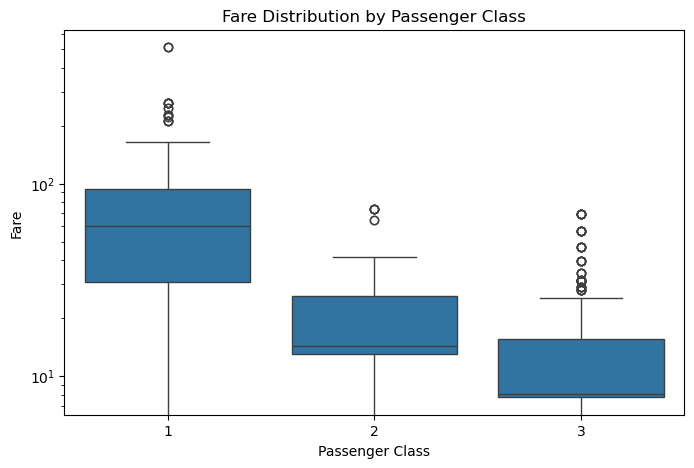

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Pclass", y="Fare", data=train_df)
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Class")
plt.yscale("log")  # Using log scale to handle extreme values
plt.show()

## Bad Visuals

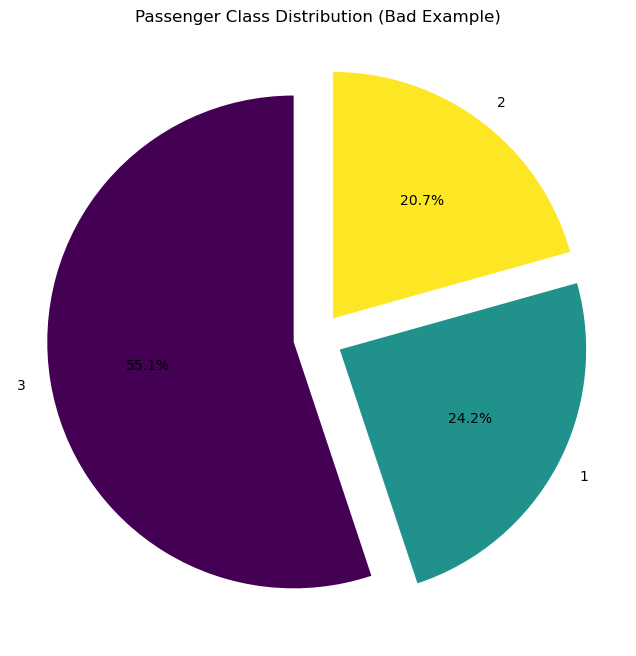

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
train_df["Pclass"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="viridis", explode=[0.1, 0.1, 0.1])
plt.title("Passenger Class Distribution (Bad Example)")
plt.ylabel("")
plt.show()

Bad visual because:
- Hard to compare slices
- No labels to decipher what class is being represented
- Font and colors make it hard to read labels

### Bad visual 2

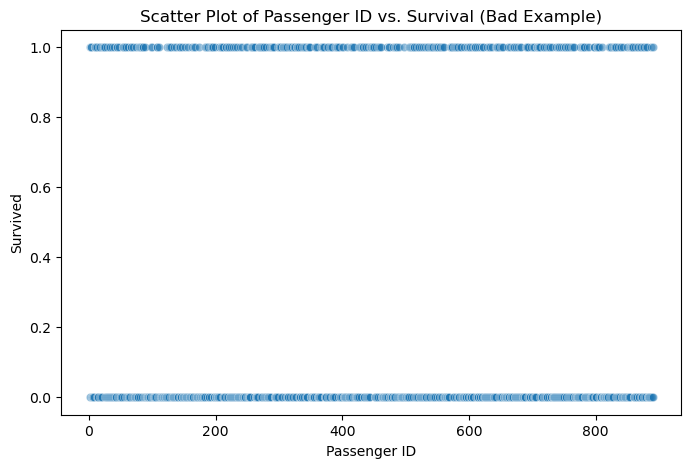

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="PassengerId", y="Survived", data=train_df, alpha=0.5)
plt.xlabel("Passenger ID")
plt.ylabel("Survived")
plt.title("Scatter Plot of Passenger ID vs. Survival (Bad Example)")
plt.show()

Bad because:
- There is no meaningful relationship
- Scatterplot provides no insight

### Bad Visualization 3

<Figure size 1000x600 with 0 Axes>

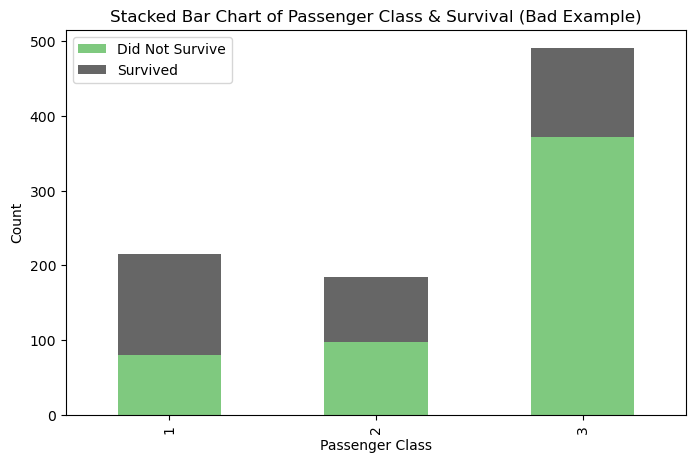

In [31]:
plt.figure(figsize=(10, 6))
train_df.groupby(["Pclass", "Survived"]).size().unstack().plot(kind="bar", stacked=True, colormap="Accent", figsize=(8, 5))
plt.title("Stacked Bar Chart of Passenger Class & Survival (Bad Example)")
plt.ylabel("Count")
plt.xlabel("Passenger Class")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

Bad because:
- Color choice isn't optimal
- stacked bar charts can tend to be misleading when comparing categories

### Bad Visualization 4

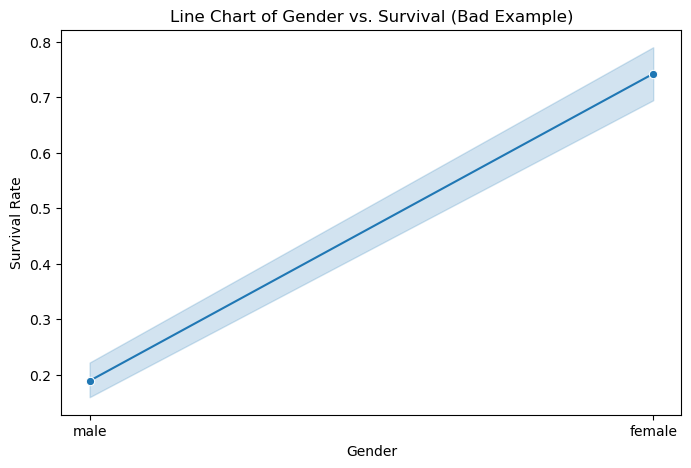

In [33]:
plt.figure(figsize=(8, 5))
sns.lineplot(x="Sex", y="Survived", data=train_df, marker="o")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Line Chart of Gender vs. Survival (Bad Example)")
plt.show()

Bad because:
it doesn't make sense. The choice in the chart isn't correct. Line charts are meant for continuous data

### Bad visualization 5

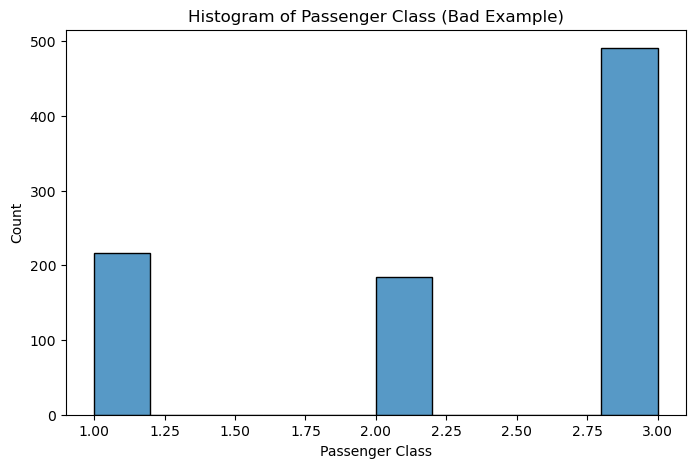

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(x="Pclass", data=train_df, bins=10)
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Histogram of Passenger Class (Bad Example)")
plt.show()